## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 11
---------------------------------------

GOALS:

1. Understand Causal vs Experimental Studies
2. Do a more free form data analysis
3. Start doing your ethics reading

----------------------------------------------------------

This homework has **2 questions**, **10 exercises** and **1 essay response**.

In [105]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
file_name = 'data/yougov-climate.csv'
DF = pd.read_csv(file_name,index_col=0)
DF.loc['total'] = DF.sum(axis=0)
DF['total'] = DF.sum(axis=1)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know,total
country,,,,,,
GB,833,604,49,33,114,1633
US,507,493,120,80,133,1333
total,1340,1097,169,113,247,2966


In the lecture we analyzed the following questions for the first column in the data:

### First question:

What percent of **all respondents** think the climate is changing and human activity is mainly responsible?  

### Second question:

What percent of **GB respondents** think the climate is changing and  human activity is mainly responsible?  

### Third Question

What percent of **US respondents** think the climate is changing and  human activity is mainly responsible?  

**Q1** Repeat the analysis from the lecture notes for one of the other columns/questions.

1. Percent total
2. Percent from GB
3. Percent from US

Talk about the conditional probability in this case:

eg. In a person is from ________ then there is a ________ probability that they believe _______. If a person answered _______ then they are more likley to be from ________. 

In [18]:
all_respondents = DF['total'].loc['total']
human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['total']
float(human_responsible/all_respondents)

0.45178691840863117

In [19]:
gb_respondants = DF['total'].loc['GB']
GB_human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['GB']
float(GB_human_responsible/gb_respondants)

0.5101041028781383

In [20]:
us_respondants = DF['total'].loc['US']
US_human_responsible = DF['The climate is changing and human activity is mainly responsible  ']['US']
float(US_human_responsible/us_respondants)

0.3803450862715679

**First Question** About 45.18% of all respondents believe that climate change is happening and that humans are the main responsibility of doing so <br><br>
**Second Question** About 51.01% of GB respondents believe that climate change is happening and that humans are the main responsibility of doing so <br><br>
**Third Question** About 38.03% of US respondents believe that climate change is happening and that humans are the main responsibility of doing so <br><br>
If a person is from the US then there is a 38.03% probability that they believe that human activity is the main cause of global warming. If a person answered that climate is changing and humans are the main factor of this cause then they are more likely to be from GB

## Berkeley admission data example

- Study carried out by the Graduate Division of the University of California, Berkeley in the early 70’s to evaluate whether there was a gender bias in graduate admissions.
- The data come from six departments. For confidentiality we'll call them A-F. 
- We have information on whether the applicant was male or female and whether they were admitted or rejected. This is an old study so only two binary classifications were used. 

### Here is the data


In [21]:
file_name = 'data/berkley.csv'
DF = pd.read_csv(file_name)
DF

,Department,Male Yes,Male No,Female Yes,Female No
0,A,512,313,89,19
1,B,353,207,17,8
2,C,120,205,202,391
3,D,138,279,131,244
4,E,53,138,94,299
5,F,22,351,24,317


In [22]:
DF_melt = pd.melt(DF,id_vars=['Department'],var_name='MF',value_name='Number')
DF_melt

,Department,MF,Number
0,A,Male Yes,512
1,B,Male Yes,353
2,C,Male Yes,120
3,D,Male Yes,138
4,E,Male Yes,53
5,F,Male Yes,22
6,A,Male No,313
7,B,Male No,207
8,C,Male No,205
9,D,Male No,279


In [23]:
DF_melt['gender'] = DF_melt['MF'].apply(lambda x: x.split(' ')[0]).copy()
DF_melt['admitted'] = DF_melt['MF'].apply(lambda x: x.split(' ')[1]).copy()

In [24]:
DF_melt

,Department,MF,Number,gender,admitted
0,A,Male Yes,512,Male,Yes
1,B,Male Yes,353,Male,Yes
2,C,Male Yes,120,Male,Yes
3,D,Male Yes,138,Male,Yes
4,E,Male Yes,53,Male,Yes
5,F,Male Yes,22,Male,Yes
6,A,Male No,313,Male,No
7,B,Male No,207,Male,No
8,C,Male No,205,Male,No
9,D,Male No,279,Male,No


### Gender distribution by department

What can we say about the gender distribution if we look at the individual departments.

Start with our original "melted" data frame:

In [25]:
my_columns = ['Number', 'gender', 'admitted']
DF_totals = DF_melt[my_columns].groupby(['gender','admitted'],as_index = False).sum()
DF_totals

,gender,admitted,Number
0,Female,No,1278
1,Female,Yes,557
2,Male,No,1493
3,Male,Yes,1198


In [28]:
#Gets the numbers for each gender
mask = DF_totals['gender'] == 'Male'
num_male = DF_totals[mask]['Number'].sum()
mask = DF_totals['gender'] == 'Female'
num_female = DF_totals[mask]['Number'].sum()

#Find the percent
mask = (DF_totals['gender'] == 'Male') & (DF_totals['admitted'] == 'Yes')
prob_male = DF_totals[mask]['Number']/num_male
mask = (DF_totals['gender'] == 'Female') & (DF_totals['admitted'] == 'Yes')
prob_female = DF_totals[mask]['Number']/num_female

In [29]:
prob_male

3    0.445188
Name: Number, dtype: float64

In [30]:
prob_female

1    0.303542
Name: Number, dtype: float64

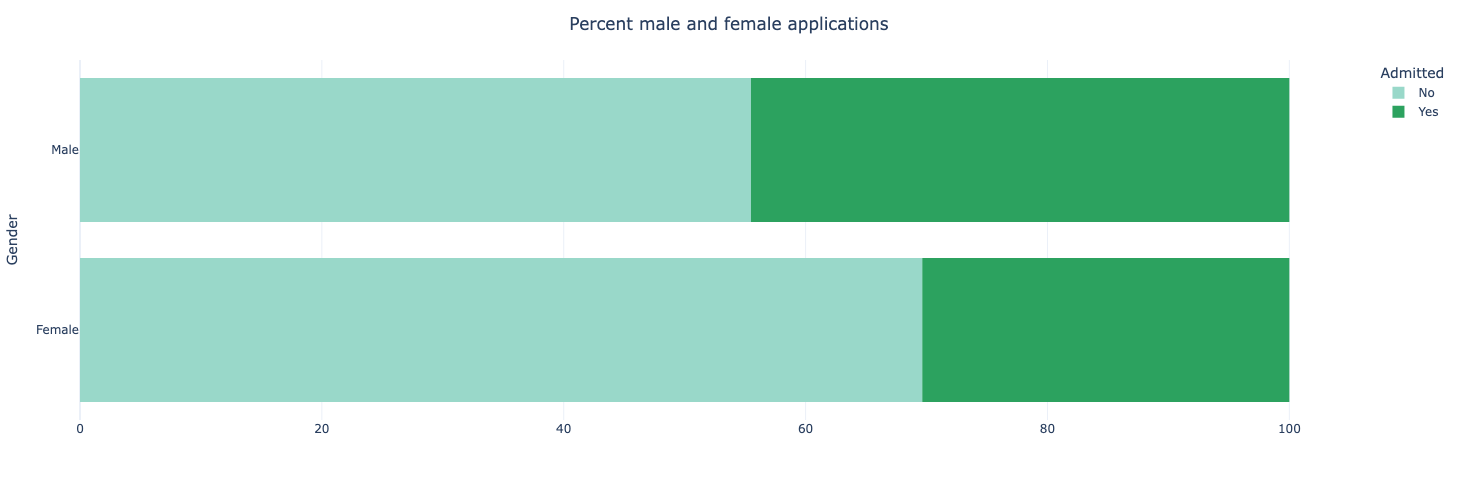

In [31]:
fig = px.histogram(DF_totals,
                     x='Number',
                     y='gender',
                     color='admitted',
                     barnorm = "percent",
                     color_discrete_map = {'No':'#99d8c9','Yes':'#2ca25f'})

fig.update_layout(title='Percent male and female applications',
                  title_x=0.5,
                  template="plotly_white",
                  xaxis_title="",
                  yaxis_title="Gender",
                  legend_title='Admitted',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

In [34]:
my_columns = ['Number','gender','admitted']
DF_totals = DF_melt[my_columns].groupby(['gender','admitted']).sum()
DF_totals

Number
gender admitted        
Female No          1278
       Yes          557
Male   No          1493
       Yes         1198

In [35]:
# Get the total numbers in each group
num_male = DF_totals.loc['Male'].sum()
num_female = DF_totals.loc['Female'].sum()

# # Find the percents
prob_male = DF_totals.loc['Male','Yes']/num_male
prob_female = DF_totals.loc['Female', 'Yes']/num_female

print(prob_male)
print(prob_female)

Number    0.445188
dtype: float64
Number    0.303542
dtype: float64


#### Lets pivot!

Pivot this data so that our departments become the column labels and our MF column becomes the index.

In [36]:
DF_dept = DF_melt.pivot(index='MF',columns='Department',values='Number')
DF_dept

Department,A,B,C,D,E,F
MF,,,,,,
Female No,19,8,391,244,299,317
Female Yes,89,17,202,131,94,24
Male No,313,207,205,279,138,351
Male Yes,512,353,120,138,53,22


In [37]:
prob_female = DF_dept['A']['Female Yes']/(DF_dept['A']['Female Yes']+DF_dept['A']['Female No'])
prob_male = DF_dept['A']['Male Yes']/(DF_dept['A']['Male Yes']+DF_dept['A']['Male No'])

In [40]:
float(prob_female*100)

82.4074074074074

In [41]:
float(prob_male*100)

62.06060606060606

**Q2** Calculate the proportions for the other departments. We did department A in the lecture. You can use the code from the lecture or come up with your own way to do this. You can do this one by one or try using a FOR loop.

Talk about what you see in these proportions. Which departments admit a large number of women? How do your number align with the visualization below?

In [48]:
departments = DF_dept.columns
proportions = {}

for i in departments:
    female_yes = DF_dept[i]['Female Yes']
    female_no = DF_dept[i]['Female No']
    male_yes = DF_dept[i]['Male Yes']
    male_no = DF_dept[i]['Male No']

    female_prob = female_yes / (female_yes + female_no)
    male_prob = male_yes / (male_yes + male_no)
    
    proportions[i] = {'Female': female_prob, 'Male': male_prob}


DFprops = pd.DataFrame(proportions).T
show(DFprops)

Loading ITables v2.5.2 from the internet... (need help?)


It is very accurate to the histogram below as we see that females are admitted largely at Dept A & B. The rest looks similar to the histogram as well 

### Here is a plot of the proportions data

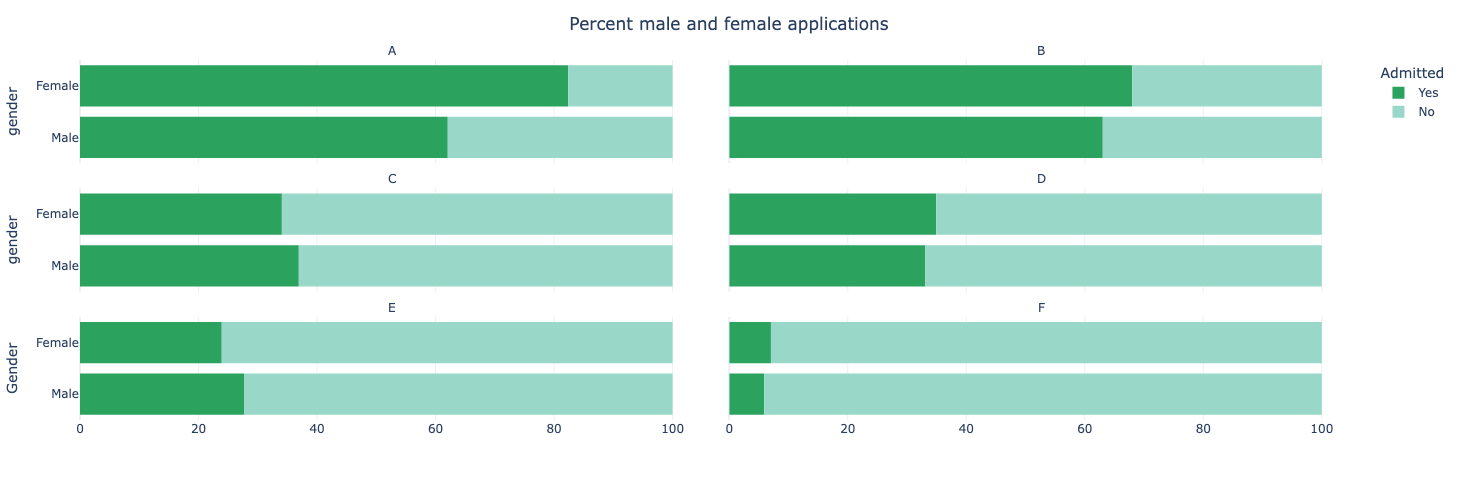

In [49]:
fig = px.histogram(DF_melt,
                   y='gender',
                   x='Number',
                   barnorm = "percent",
                   color='admitted',
                   facet_col='Department',
                   facet_col_wrap=2,
                   color_discrete_map = {'No':'#99d8c9','Yes':'#2ca25f'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(title_text='')

fig.update_layout(title='Percent male and female applications',
                  title_x=0.5,
                  template="plotly_white",
                  xaxis_title="",
                  yaxis_title="Gender",
                  legend_title='Admitted',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

------------------------
------------------------

## Homework - Exercises

** Homework content and data from Data Science in a Box - he-05-legos.Rmd

This week we'll do some data gymnastics to refresh and review what we learned over the past few weeks using (**simulated**) data from Lego sales in 2018 for a sample of customers who bought Legos in the US. This is different than the data we used on the Exam!


### Data

In [115]:
file_name = 'data/lego-sales.csv'
DF = pd.read_csv(file_name)
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2


### Exercises

* Answer the following questions using reproducible Python code.
* For each question, state your answer in a sentence, e.g. "In this sample, the first three common names of purchasers are ...".
* Note that the answers to all questions are within the context of this particular sample of sales, i.e. you shouldn't make inferences about the population of all Lego sales based on this sample.

-------------

1.  Describe what you see in the data set (variables, observations, etc)

2.  What are the three most common first names of purchasers?

3.  What are the three most common themes of Lego sets purchased?

4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

5.  Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks and create separate data frames -OR- create a new column with these categorical labels (more advanced).

6.  Which age group has purchased the highest number of Lego sets.

7.  Which age group has spent the most money on Legos?

8.  Which Lego theme has made the most money for Lego? HINT: Simpler than #5, just use a groupby()

9.  Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. HINT: You will need to split the phone number and get just the first three. You decided what to do about reporting the NaNs.

10.  Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

In [116]:
DF.shape
#We see that there is 620 observations and 14 variables in the DataFrame

(620, 14)

In [117]:
DF['first_name'].value_counts()
#Jackson is the most common name

first_name
Jackson       13
Joseph        11
Jacob         11
Michael       10
Kaitlyn        8
              ..
Gunnar         1
David          1
Lawrence       1
John'Dunae     1
Kimberly       1
Name: count, Length: 211, dtype: int64

In [118]:
DF['theme'].value_counts()
#Star Wars has the most amount themed lego products

theme
Star Wars                  75
Nexo Knights               64
Gear                       55
Mixels                     55
City                       45
Friends                    42
Ninjago                    38
Duplo                      35
Bionicle                   34
Creator                    25
DC Comics Super Heroes     22
Elves                      22
Marvel Super Heroes        19
Dimensions                 18
Disney Princess            15
The Angry Birds Movie      11
Technic                    10
Architecture               10
Minecraft                   9
Advanced Models             4
Ghostbusters                3
Seasonal                    3
Collectable Minifigures     3
Ideas                       2
Classic                     1
Name: count, dtype: int64

In [119]:

theme = DF['theme'].value_counts().idxmax()

DF_theme = DF[DF['theme'] == theme]

DF_theme['subtheme'].value_counts()

subtheme
The Force Awakens            15
Buildable Figures            11
Episode V                    10
MicroFighters                10
Battlefront                   7
Original Content              7
Episode III                   6
Rebels                        3
Seasonal                      3
Episode IV                    2
Ultimate Collector Series     1
Name: count, dtype: int64

In [120]:
def groupAge(age):
    if age <= 18:
        return "Under 18"
    elif age <= 25:
        return "19-25"
    elif age <= 35:
        return "26-35"
    elif age <= 50:
        return "36-50"
    else:
        return "Over 51"

DF['age_groups'] = DF['age'].apply(groupAge)
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity,age_groups
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1,19-25
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,26-35
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1,26-35
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1,36-50
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1,36-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2,Under 18
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2,26-35
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1,26-35
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2,36-50


In [121]:
DF['age_groups'].value_counts()

age_groups
36-50       216
26-35       183
19-25       129
Over 51      62
Under 18     30
Name: count, dtype: int64

In [122]:
DF.groupby('age_groups')['us_price'].sum().sort_values(ascending=False)

age_groups
36-50       6641.84
26-35       5260.17
19-25       3629.71
Over 51     1832.38
Under 18     641.70
Name: us_price, dtype: float64

In [123]:
DF.groupby('theme')['us_price'].sum().sort_values(ascending=False)

theme
Star Wars                  2842.25
Ninjago                    1649.62
Nexo Knights               1569.36
City                       1476.55
Minecraft                  1439.91
Gear                       1056.45
Friends                     924.58
Duplo                       854.65
Elves                       809.78
Advanced Models             679.96
Bionicle                    549.66
Marvel Super Heroes         539.81
Technic                     492.90
Ghostbusters                469.97
DC Comics Super Heroes      450.78
Creator                     409.75
Architecture                389.90
The Angry Birds Movie       375.89
Dimensions                  369.82
Mixels                      274.45
Disney Princess             167.85
Ideas                       139.98
Classic                      29.99
Seasonal                     29.97
Collectable Minifigures      11.97
Name: us_price, dtype: float64

In [124]:
DF['area_code'] = DF['phone_number'].astype(str).str.slice(0, 3)
area_spending = DF.groupby('area_code')['us_price'].sum().sort_values(ascending=False)
area_spending

area_code
nan    2612.08
973     444.94
281     434.91
956     359.98
209     329.95
        ...   
308       9.99
509       9.99
325       9.98
520       5.99
636       4.99
Name: us_price, Length: 157, dtype: float64

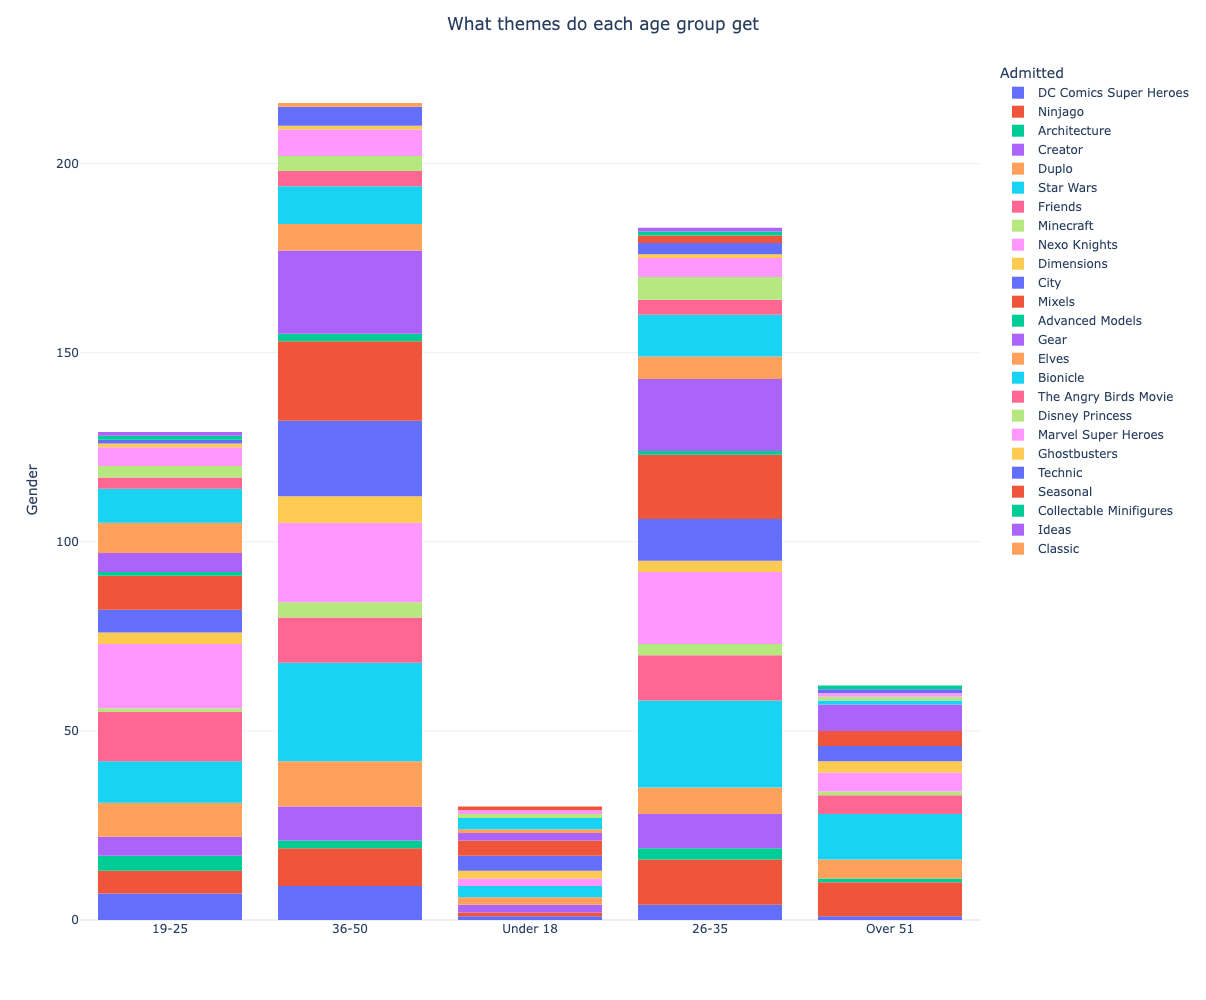

In [139]:
fig = px.histogram(DF,
                   x ='age_groups',
                    color = 'theme')
fig.update_layout(title='What themes do each age group get',
                  title_x=0.5,
                  template="plotly_white",
                  xaxis_title="",
                  yaxis_title="Gender",
                  legend_title='Admitted',
                  autosize=False,
                  width=800,
                  height=1000)
fig.show()

## Essay Response

Give a brief report on what you are reading and what you have learned so far. If you chose your own articles please insert a link to the articles. If you chose a book, please give the book title and author.

1. What drew you to the book/articles
2. What have you learned so far.

eg. In the first chapter of the book the author talks about..... or My first article discusses..... or I disagree with what the author is saying so far.... or I really like what I am learning about because....